# Sentiment Analysis

## Importar Librerías

In [1]:
#!pip install emoji
#!pip install uralicNLP
#!pip install hfst
#!pip install hfst-dev
#!pip install sentiment-analysis-spanish
#!pip install transformers

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import emoji
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sentiment_analysis_spanish import sentiment_analysis

from transformers import pipeline

In [3]:
#nltk.download('all')
#uralicApi.download("spa")

## Limpieza de Datos

In [4]:
df = pd.read_csv("data\Datathon 2024 - Reto Hey - Dataset Puìblico - Sheet1.csv")
df.shape

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HP\AppData\Local\Temp\ipykernel_3284\785963788.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("data\Datathon 2024 - Reto Hey - Dataset Puìblico - Sheet1.csv")


(812, 3)

In [5]:
df.head(10)

,date,time,tweet
0,01/01/2023,NaN,"Resuelto, muchísimas gracias , excelente servi..."
1,02/01/2023,NaN,"Muchas gracias, espero su dm"
2,02/01/2023,NaN,Muchas gracias!
3,02/01/2023,NaN,Algo similar me paso. Quería renovar mi token ...
4,02/01/2023,NaN,Yeeeei! a través de mi cuenta en acabo de cont...
5,02/01/2023,NaN,Esta es la señal que necesitan para tener el m...
6,03/01/2023,NaN,Gracias 😁
7,03/01/2023,NaN,Muchas gracias 😊
8,03/01/2023,NaN,"Yo no sé mucho, pero te recomiendo la Inversió..."
9,04/01/2023,NaN,Gracias por la playera que me dieron en Galerí...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    812 non-null    object
 1   time    424 non-null    object
 2   tweet   812 non-null    object
dtypes: object(3)
memory usage: 19.2+ KB


In [7]:
df["car"] = [len(msg) for msg in df["tweet"]]
df["pal"] = [len(msg.split()) for msg in df["tweet"]]

In [8]:
df.head(10)

,date,time,tweet,car,pal
0,01/01/2023,NaN,"Resuelto, muchísimas gracias , excelente servi...",62,8
1,02/01/2023,NaN,"Muchas gracias, espero su dm",28,5
2,02/01/2023,NaN,Muchas gracias!,15,2
3,02/01/2023,NaN,Algo similar me paso. Quería renovar mi token ...,159,28
4,02/01/2023,NaN,Yeeeei! a través de mi cuenta en acabo de cont...,252,47
5,02/01/2023,NaN,Esta es la señal que necesitan para tener el m...,69,13
6,03/01/2023,NaN,Gracias 😁,9,2
7,03/01/2023,NaN,Muchas gracias 😊,16,3
8,03/01/2023,NaN,"Yo no sé mucho, pero te recomiendo la Inversió...",182,36
9,04/01/2023,NaN,Gracias por la playera que me dieron en Galerí...,53,10


### Algunas Gráficas Iniciales

C:\Users\juanj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Cantidad de Caracteres'), Text(0, 0.5, 'Conteo')]

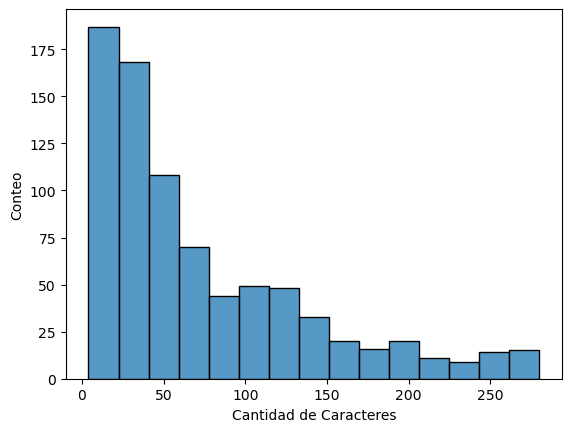

In [9]:
# Equivalente a:
sns.histplot(x = "car", data = df).set(xlabel='Cantidad de Caracteres', ylabel='Conteo')

# Convertir a svg:
plt.savefig(r'.\img\caracteres.svg')

C:\Users\juanj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Cantidad de Palabras'), Text(0, 0.5, 'Conteo')]

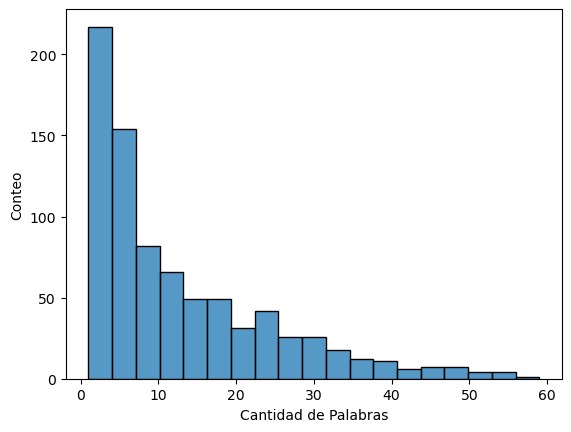

In [10]:
# Equivalente a:
sns.histplot(x = "pal", data = df).set(xlabel='Cantidad de Palabras', ylabel='Conteo')

# Convertir a svg:
plt.savefig(r'.\img\palabras.svg')

In [11]:
df.sort_values(by = 'pal', ascending = True).head(20)

,date,time,tweet,car,pal
81,25/01/2023,NaN,Gracias!!!,10,1
201,08/03/2023,NaN,Gracias!,8,1
256,24/03/2023,NaN,Gracias!,8,1
202,08/03/2023,NaN,Listo!!!,8,1
207,09/03/2023,NaN,ayuda!!!,8,1
250,22/03/2023,NaN,Gracias,7,1
715,11/01/2024,15:20:48,Gracias,7,1
740,26/01/2024,17:41:58,Jajaja,6,1
215,13/03/2023,NaN,Gracias!,8,1
562,02/10/2023,19:50:21,Gracias,7,1


In [12]:
df.sort_values(by = 'pal', ascending = False).head(20)

,date,time,tweet,car,pal
745,01/02/2024,00:51:32,"de debito puedes pedir nu desde la app, tmb he...",277,59
95,28/01/2023,NaN,"Amistad, usa si usas tu tarjeta 6 veces al mes...",268,54
620,31/10/2023,18:51:34,Lo verdaderamente interesante de heybanco es s...,271,54
777,16/03/2024,16:45:25,Hice por mail una sugerencia en la app en cuan...,276,53
55,18/01/2023,NaN,💰La sexta opción está opción es de las mejores...,268,53
217,13/03/2023,NaN,Me siguen hablando en horario laboral.El que s...,276,52
784,27/03/2024,20:47:08,Yo sí recomiendo! Aunque siento que es difícil...,276,52
434,06/07/2023,05:06:15,"ay suena súper bien, justo lo que me anda gust...",268,52
27,10/01/2023,NaN,"Es de 35,000 UDIS (184,000).De todas las plata...",273,51
393,16/06/2023,18:03:36,He probado 4 bancos tradicionales diferentes y...,261,49


### Desemojizar

In [13]:
for i in range(len(df)):
    df.loc[i,'tweet'] = emoji.demojize(df.loc[i,'tweet'], language='es')

In [14]:
df

,date,time,tweet,car,pal
0,2023-01-01,NaN,"Resuelto, muchísimas gracias , excelente servi...",62,8
1,2023-01-02,NaN,"Muchas gracias, espero su dm",28,5
2,2023-01-02,NaN,Muchas gracias!,15,2
3,2023-01-02,NaN,Algo similar me paso. Quería renovar mi token ...,159,28
4,2023-01-02,NaN,Yeeeei! a través de mi cuenta en acabo de cont...,252,47
...,...,...,...,...,...
807,2024-04-21,15:21:43,"Ahora confirmo, gracias estimado",32,4
808,2024-04-23,22:52:05,:cara_desanimada: de acuerdo!! Muchas gracias.,30,5
809,2024-04-23,21:30:12,"Tío cuando me van a graduar, tengo la TDC gara...",149,32
810,2024-04-25,00:51:24,"una duda, con quién tengo que ver si tengo pro...",195,38


## Sentiment Analysis

### Preprocesar Texto

In [15]:
# Función para preprocesar el texto
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('spanish')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

In [16]:
df['reviewText'] = df['tweet'].apply(preprocess_text)
df

,date,time,tweet,car,pal,reviewText
0,01/01/2023,NaN,"Resuelto, muchísimas gracias , excelente servi...",62,8,"resuelto , muchísimas gracias , excelente serv..."
1,02/01/2023,NaN,"Muchas gracias, espero su dm",28,5,"muchas gracias , espero dm"
2,02/01/2023,NaN,Muchas gracias!,15,2,muchas gracias !
3,02/01/2023,NaN,Algo similar me paso. Quería renovar mi token ...,159,28,similar paso . quería renovar token poder hace...
4,02/01/2023,NaN,Yeeeei! a través de mi cuenta en acabo de cont...,252,47,yeeeei ! través cuenta acabo contratar cuenta ...
...,...,...,...,...,...,...
807,21/04/2024,15:21:43,"Ahora confirmo, gracias estimado",32,4,"ahora confirmo , gracias estimado"
808,23/04/2024,22:52:05,:cara_desanimada: de acuerdo!! Muchas gracias.,30,5,: cara_desanimada : acuerdo ! ! muchas gracias .
809,23/04/2024,21:30:12,"Tío cuando me van a graduar, tengo la TDC gara...",149,32,"tío van graduar , tdc garantizada hace año saq..."
810,25/04/2024,00:51:24,"una duda, con quién tengo que ver si tengo pro...",195,38,"duda , quién ver si problemas aumentar línea c..."


### NLTK Sentiment Analysis

In [17]:
# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

# apply get_sentiment function
df['sentNLTK'] = df['reviewText'].apply(get_sentiment)

### SentimentAnalysisSpanish

In [18]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
#print(sentiment.sentiment("me gusta la tombola es genial"))

df['sentSpnsh'] = df['reviewText'].apply(sentiment.sentiment)

C:\Users\juanj\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\juanj\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [19]:
#wnl = WordNetLemmatizer()
#print(wnl.lemmatize('resting'))

In [20]:
#from uralicNLP import uralicApi
#print(uralicApi.lemmatize("poder","spa"))

In [21]:
#df[['reviewText', 'sentiment']].head(25)

### Sentiment Analysis Transformers

In [22]:
classifier = pipeline('sentiment-analysis', 
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

results = classifier(list(df['reviewText']))

#for i in range(len(results)):
#    print(df.loc[i, 'reviewText'])
#    print(f"polaridad: {results[i]['label']}, score: {round(results[i]['score'], 4)}")
    
results = [int(result['label'].split()[0]) for result in results]
df['sentTransf'] = results
df

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


,date,time,tweet,car,pal,reviewText,sentNLTK,sentSpnsh,sentTransf
0,2023-01-01,NaN,"Resuelto, muchísimas gracias , excelente servi...",62,8,"resuelto , muchísimas gracias , excelente serv...",0,0.999168,5
1,2023-01-02,NaN,"Muchas gracias, espero su dm",28,5,"muchas gracias , espero dm",0,0.408846,5
2,2023-01-02,NaN,Muchas gracias!,15,2,muchas gracias !,0,0.470564,5
3,2023-01-02,NaN,Algo similar me paso. Quería renovar mi token ...,159,28,similar paso . quería renovar token poder hace...,1,0.062695,1
4,2023-01-02,NaN,Yeeeei! a través de mi cuenta en acabo de cont...,252,47,yeeeei ! través cuenta acabo contratar cuenta ...,0,0.003187,1
...,...,...,...,...,...,...,...,...,...
807,2024-04-21,15:21:43,"Ahora confirmo, gracias estimado",32,4,"ahora confirmo , gracias estimado",0,0.008521,5
808,2024-04-23,22:52:05,:cara_desanimada: de acuerdo!! Muchas gracias.,30,5,: cara_desanimada : acuerdo ! ! muchas gracias .,0,0.302336,5
809,2024-04-23,21:30:12,"Tío cuando me van a graduar, tengo la TDC gara...",149,32,"tío van graduar , tdc garantizada hace año saq...",0,0.123029,5
810,2024-04-25,00:51:24,"una duda, con quién tengo que ver si tengo pro...",195,38,"duda , quién ver si problemas aumentar línea c...",0,0.000007,1


In [23]:
"""
classifier = pipeline('sentiment-analysis', 
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

sentences = ["HeyBanco me hace muy feliz, es lo mejor",
            "Odio a todos, en especial a HeyBanco, es una basura",
            "Hoy tuve un problema con mi tarjeta de crédito, pero ya lo solucioné"]

results = classifier(sentences)
for result in results:
    print(f"polaridad: {result['label']}, score: {round(result['score'], 4)}")
    print(int(result['label'].split()[0]))

results = [int(result['label'].split()[0]) for result in results]
print(results)
"""

'\nclassifier = pipeline(\'sentiment-analysis\', \n                      model="nlptown/bert-base-multilingual-uncased-sentiment")\n\nsentences = ["HeyBanco me hace muy feliz, es lo mejor",\n            "Odio a todos, en especial a HeyBanco, es una basura",\n            "Hoy tuve un problema con mi tarjeta de crédito, pero ya lo solucioné"]\n\nresults = classifier(sentences)\nfor result in results:\n    print(f"polaridad: {result[\'label\']}, score: {round(result[\'score\'], 4)}")\n    print(int(result[\'label\'].split()[0]))\n\nresults = [int(result[\'label\'].split()[0]) for result in results]\nprint(results)\n'

In [24]:
df.to_csv('sentimiento.csv', index=False)

El siguiente código es una demostración de la aplicación con flet

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import flet as ft
from flet import View, Page, AppBar, 

matplotlib.use("svg")

def main(page: ft.Page):
    page.title="sentiment analysis"
    img = ft.Image(
        src=r'img\caracteres.svg'
    )

    page.add(img)
    page.update()

ft.app(target=main)

RuntimeError: asyncio.run() cannot be called from a running event loop